# LaTeX Support

In [1]:
import pandas as pd

from lets_plot import *


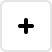
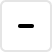
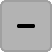
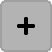
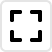
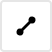
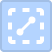
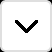
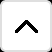
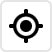
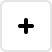
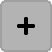
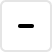
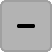
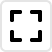
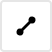
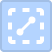
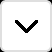
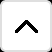
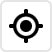

In [2]:
LetsPlot.setup_html()

## Power Degree

In [3]:
data1 = {'x': list(range(-10, 11))}
ggplot() + \
    geom_function(aes(x='x'), data=data1, fun=lambda x: x**3 - 100 * x) + \
    ggtitle("Graph of the \( y = x^3 - 100 x \)") + \
    theme(text=element_text(family="Times New Roman"), \
          plot_title=element_text(size=20, face='bold'))

## Subscript

Dataset: [owid-co2-data.csv](https://github.com/owid/co2-data/blob/master/owid-co2-data.csv) © [Our World in Data](https://ourworldindata.org) ([Licensed under CC BY 4.0](https://creativecommons.org/licenses/by/4.0/))

In [4]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv")
df = raw_df[raw_df["country"].isin(["World", "United States", "United Kingdom", "China", "India"])]

ggplot(df, aes("year", "co2_per_capita", color="country")) + \
    geom_line(tooltips=layer_tooltips().title("@year\nin tonnes per person").format("year", "d")
                                       .line("@country: @co2_per_capita").format("@co2_per_capita", "{.1f} t")) + \
    scale_x_continuous(name="", format="d") + \
    scale_y_continuous(name="", format="{d} t", expand=[0, 0]) + \
    ggtitle("Per capita \( CO_2 \) emissions") + \
    ggsize(1000, 400) + \
    theme(text=element_text(family="Playfair Display"), \
          plot_title=element_text(size=20, face='bold'))

## Greek Letters and Other Special Symbols

In [5]:
ggplot() + \
    geom_text(x=0, label=r"\( e^{i \cdot \pi} = -1 \)", \
              size=70, family="Computer Modern Math", fontface='italic') + \
    theme_void()

## Place Your Formulas Anywhere!

In [6]:
data2 = {
    "x": [r"\( \Omega_{\rho + 1} \)"],
    r"\(\delta\)": [1],
    "f": [r"\( A \neq B^2 \)"],
}

ggplot(data2) + \
    geom_bar(aes("x", r"\(\delta\)", fill="x"), stat='identity', \
             labels=layer_labels().line("@f"), \
             tooltips=layer_tooltips().line("@f")) + \
    scale_fill_manual(["#6a3d9a"], name=r"\(\Sigma\)") + \
    xlab(r"\(\sigma\)") + \
    theme(label_text=element_text(size=20))